<center><h1>Literacy Attainment of Native- and Foreign-born children - Cleaning and Filtering the Data</h1></center>  

# Introduction

I have been concerned with the Syrian Civil War and the ensuing refugee crisis, since the start of the conflict in 2011 when I was a student of Arabic at University of Edinburgh. Since then, I have worked directly with displaced people from this and other conflicts in Egypt, Lebanon and Greece. Whilst working with unaccompanied asylum-seeking children in Greece, I observed first hand the country's struggles to integrate asylum-seeking children into its national school system, and ultimately focused on this for my [Master's dissertation](https://sophieespencer.wordpress.com/2019/09/02/growth-unlocked/). In this dissertation, I identified the specific learning needs of refugee and asylum-seeking children as psycho-social support, protection from discrimination and bullying, and language acquisiton support. I also reviewed how other countries with high numbers of asylum-seeking children were addressing this challenge. 

Subsequently, I wanted to undertake a comparative investigation of countries with high numbers of asylum-seeking children to understand which countries were most successful at integrating foreign-born children into their national school systems. In the following analysis, I use data from the IEA’s Progress in International Reading Literacy Study 2021 (PIRLS 2021), an international assessment of fourth-grade students’ reading abilities conducted across 57 countries, to assess literacy outcomes for native and foreign-born children across nine countries with significant refugee populations. 

The goal of this study is to serve as a preliminary quantitative investigation to identify countries that demonstrate best practice in integrating foreign-born children into their national school systems, so that further targeted investigations into successful policies and practices can be made. 

## Research Questions

This study is guided by the following research questions:

- How do average literacy scores compare across countries with significant refugee populations?

- Are there significant differences in literacy scores between native- and foreign-born children in these countries?

- How does the age at which foreign-born children arrive in a host country affect their literacy outcomes?

## Data Compiling, Cleaning and Filtering

The data for this analysis was downloaded  [here](https://pirls2021.org/data/) as separate SPSS files categorized by questionnaire type and country.

After an initial review of the available data files, I selected specific files, converted them to Excel format, concatenated them into a single dataset and removed irrelevant columns. 

To view the concatenation process, please <a href="https://github.com/SophieESpencer/Comparison/blob/main/Final%20Notebooks/1.%20Importing%2C%20Organising%20and%20Merging%20Datasets.ipynb">click here</a>.
 

# Cleaning the Data

## Importing the Data and relevant packages

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', None) 
pd.set_option('display.expand_frame_repr', False)  
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_excel('data99.xlsx', index_col=0)

I will first get an initial overview of the dataset. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50367 entries, 0 to 50366
Data columns (total 57 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   IDCNTRY   50367 non-null  int64  
 1   IDSTUD    50367 non-null  int64  
 2   ASBH02A   41503 non-null  object 
 3   ASBH02B   16269 non-null  object 
 4   ASBH03A   41179 non-null  object 
 5   ASBH04    41231 non-null  object 
 6   ASBH15A   37405 non-null  object 
 7   ASBH15B   34597 non-null  object 
 8   ASBH16    40406 non-null  object 
 9   ASBH17A   36503 non-null  object 
 10  ASBH17B   32361 non-null  object 
 11  ASBH18AA  40161 non-null  object 
 12  ASBH18AB  35131 non-null  object 
 13  ASBG01    49428 non-null  object 
 14  ASBG03    48168 non-null  object 
 15  ASDAGE    50358 non-null  float64
 16  ASBG10A   48311 non-null  object 
 17  ASBG10B   48077 non-null  object 
 18  ASBG10C   47893 non-null  object 
 19  ASBG10D   47822 non-null  object 
 20  ASBG10E   47844 non-null  ob

The dataset contains 57 columns and 50367 rows of data. Ideally, all columns would have integer or float dtypes. However, many columns have object dtype indicating they may contain both numerical and string values. This will need to be fixed before analysis can begin. 

## Grouping the Columns

As there are so many columns, for ease of analysis, it would help to group them based on what they represent. First I will review the columns and their values using the codebooks provided by PIRLS.

- The following columns represent demographic information and currently have an 'object' dtype: `['ASBH02A', 'ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03']`.

- The following columns represent feelings in school and share the same set of categorical values as defined in the codebook. They currently have an 'object' dtype: `['ASBG10A', 'ASBG10B', 'ASBG10C', 'ASBG10D', 'ASBG10E', 'ASBG10F']`.

- The following columns represent experiences in school, and share the same set of categorical values as defined in the codebook. They currently have an 'object' dtype: `['ASBG11A', 'ASBG11B', 'ASBG11C', 'ASBG11D', 'ASBG11E', 'ASBG11F', 'ASBG11G', 'ASBG11H', 'ASBG11I', 'ASBG11J']`. 

- The following columns represent literacy test scores, which are measured on an interval scale ranging from 0 to 600. They have a 'float' dtype, which is expected: `['ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05', 'ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05', 'ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05', 'ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05', 'ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05']`.

After reviewing the columns, I have chosen to create the following column groupings:

In [4]:
main_variables = ['IDCNTRY','ASBH02A']
demographic_info_columns = ['ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03', 'ASDAGE','MINAGEARRIVAL' ]
feelings_in_school_columns = ['ASBG10A', 'ASBG10B','ASBG10C', 'ASBG10D', 'ASBG10E', 'ASBG10F']
experiences_in_school_columns = ['ASBG11A', 'ASBG11B', 'ASBG11C', 'ASBG11D', 'ASBG11E', 'ASBG11F', 'ASBG11G', 'ASBG11H', 'ASBG11I', 'ASBG11J']
assessment_score_columns = ['ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05', 'ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05', 'ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05', 'ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05', 'ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05']

- `main_variables`: Country and nativity status.
- `demographic_info_columns`: These columns primarily come from the Home Context Survey, which was answered by parents. 
- `feelings_in_school_columns`: These columns reflect children’s self-reported feelings about school.
- `experiences_in_school_columns`: This set of columns relates to children's self-reported experiences, particularly focusing on the frequency of negative experiences.
- `assessment_score_columns`: These columns contain the literacy and reading test scores from the PIRLS assessment.


## Nativity Status Column

The most important column for this analysis is `ASBH02A`, 'Was your child born in (Country)?', I therefore want to firstly remove any rows of data that have no answer to this question.

In [5]:
df = df[df['ASBH02A'].notna() & (df['ASBH02A'] != 9)].copy()

In [6]:
df.shape

(41365, 57)

Removing the rows that do not contain nativity status data has reduced the dataset by 9002 rows. 

As shown above, this column has 'Object' dtype so I want to examine the column values a litte more closely. 

In [7]:
df["ASBH02A"].value_counts(dropna=False)

Yes    25072
1      13403
No      2342
2        548
Name: ASBH02A, dtype: int64

This column contains both integer and string values. For readibility in the analysis stage, I want to replace these values with ones that represent their actual meaning.

In [8]:
update_dict_ASBH02A = {1.0: 'native_born',2.0:'foreign_born','Yes': 'native_born','No':'foreign_born' }

df['ASBH02A'] = df['ASBH02A'].map(update_dict_ASBH02A).fillna(df['ASBH02A'])
df['ASBH02A'].value_counts()

native_born     38475
foreign_born     2890
Name: ASBH02A, dtype: int64

## Country Column

Another fundamental column in the subsequent analysis is the `IDCNTRY` column, which currently contains numbers representing different countries.

I will first rename the column for clarity and then update the column values from integers to more readable strings for analysis.

In [9]:
df= df.rename(columns={'IDCNTRY': 'Country'})

update_dict = {40: 'Austria', 818: 'Egypt', 250:'France', 276:'Germany',364:'Iran',400:'Jordan',528:'Netherlands',752:'Sweden',792:'Turkey'}

df['Country'] = df['Country'].map(update_dict).fillna(df['Country'])

In [10]:
df["Country"].value_counts(dropna=False)

Egypt          7354
Iran           5840
Jordan         5801
Turkey         5596
France         4768
Austria        4476
Sweden         2989
Germany        2515
Netherlands    2026
Name: Country, dtype: int64

## Age of Arrival Columns

`ASBH02B` is a follow up question to the nativity question `ASBH02A`: 'If No, How old was your child when he/she came to (country)?'. This column will be helpful to see how age of arrival affects foreign-born children's experience of school. 

I will explore the values in this column.

In [11]:
df['ASBH02B'].value_counts(dropna=False)

NaN                         25234
6                           13402
Younger than 3 years old      928
3 to 5 years old              692
6 to 7 years old              375
8 years old or older          186
1                             182
2                             160
3                             108
4                              63
9                              35
Name: ASBH02B, dtype: int64

The column contains both strings and integers indicating countries have inputted their data in different ways. I will assign the corresponding ordinal numbers to the string values as shown in the codebook.

In [12]:
def map_using_patterns(text):
    pattern_to_integer = {
        r'Younger': 1,
        r'5': 2,
        r'7': 3,
        r'8': 4
    }

    if isinstance(text, str):
        for pattern, integer in pattern_to_integer.items():
            if pd.Series([text]).str.contains(pattern).any():
                return integer
    return text  


df['ASBH02B'] = df['ASBH02B'].apply(map_using_patterns)


In [13]:
df['ASBH02B'].value_counts(dropna=False)

NaN    25234
6.0    13402
1.0     1110
2.0      852
3.0      483
4.0      249
9.0       35
Name: ASBH02B, dtype: int64

I will assign more intuitive integer values to this column for clarity: -1 for native-born children, 0 for those younger than 3 years old, 3 for ages 3 to 5, 6 for ages 6 to 7, and 8 for those 8 years or older at the time of arrival.

In [14]:
def populate_column(row):
    if row['ASBH02A'] == 'native_born':
        return -1
    if row['ASBH02B'] == 1:
        return 0
    elif row['ASBH02B'] == 2:
        return 3
    elif row['ASBH02B'] == 3:
        return 6
    elif row['ASBH02B'] == 4:
        return 8
    else:
        return None  

df['MINAGEARRIVAL'] = df.apply(populate_column, axis=1)

In [15]:
df['MINAGEARRIVAL'].value_counts(dropna=False)

-1.0    38475
 0.0     1110
 3.0      852
 6.0      483
 8.0      249
 NaN      196
Name: MINAGEARRIVAL, dtype: int64

## ASDAGE Column

In [16]:
df['ASDAGE'].head()

0    10.17
1     9.42
2     9.50
3     9.58
4     9.58
Name: ASDAGE, dtype: float64

The `ASDAGE` column represents the child's age at the time the test was taken, measured on an interval scale. Since the values are recorded with decimal places, I will round them to integers for analysis to reduce the number of unique values.

In [17]:
df['ASDAGE'] = df['ASDAGE'].round()

In [18]:
df['ASDAGE'].value_counts()

10.0    32829
11.0     6158
9.0      1762
12.0      516
13.0       63
14.0       14
8.0        14
99.0        3
7.0         1
Name: ASDAGE, dtype: int64

I will replace the 99.0 value with `NaN`.

In [19]:
df['ASDAGE']= df['ASDAGE'].replace(99.0, np.nan)

In [20]:
df['ASDAGE'].value_counts()

10.0    32829
11.0     6158
9.0      1762
12.0      516
13.0       63
14.0       14
8.0        14
7.0         1
Name: ASDAGE, dtype: int64

## Understanding Missing Data

Now that I have made the `Country`, `ASBH02A`, and `ASBH02B` columns more readible, and removed rows with no value for the `ASBH02A` column, it would be helpful to understand the extent of missing data across countries and nativity status to see if there are any major gaps. 

In [21]:
pivot_table_test = df.pivot_table(
    index=['Country','ASBH02A'],
    aggfunc=lambda x: x.isnull().sum(),
)

In [22]:
total_counts = df.groupby(['Country','ASBH02A']).size()

percentage_missing = pivot_table_test.div(total_counts, axis=0) * 100

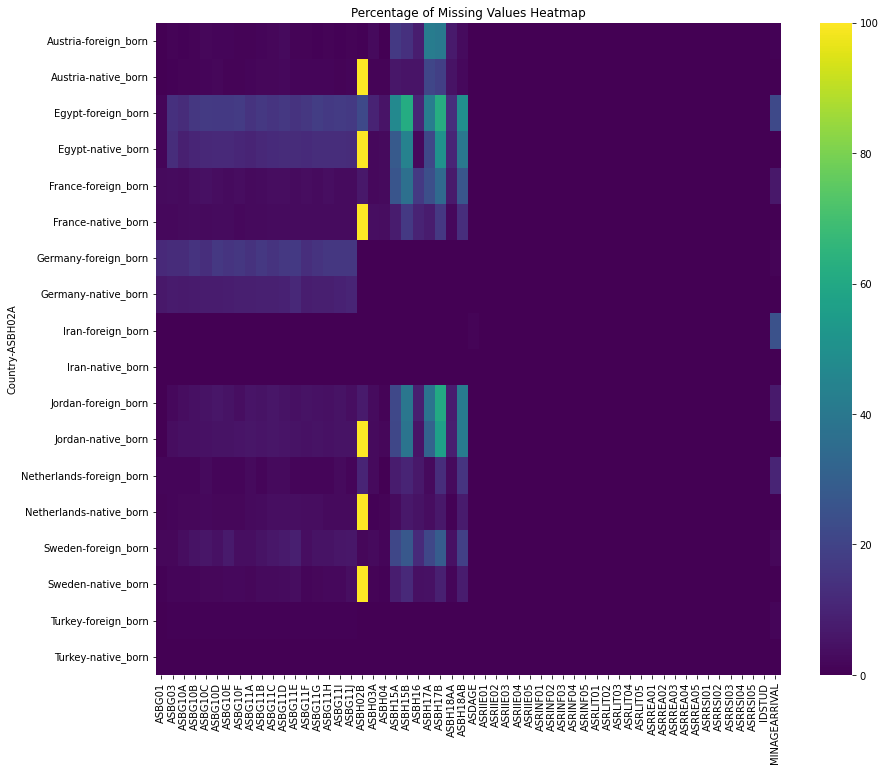

In [23]:
plt.figure(figsize=(14,12 ))
sns.heatmap(percentage_missing, annot=False, cmap='viridis', fmt='.2f')

plt.title('Percentage of Missing Values Heatmap')
plt.show()

In the heatmap above, the yellow blocks represent no datapoints at all. This makes sense for native-born children in the columns `ASBH02B` as that corresponds to age of arrival in country. Austria, Egypt, France, Jordan, Netherlands and Sweden all appear to have some missing data in the demographic columns sourced from the Home Context Data. There is also some missing data for the experience in school columns. There is no missing data for assessment scores. 

## Uniform Column Values

Now, I want to check the unique values in each column to ensure consistency, avoid mixed data types and replace invalid values with `NaN`.

### Experience in School Columns

I will start by looking at the values in the 'experiences_in_school_columns'.

In [24]:
unique_values_school_experience = df[experiences_in_school_columns].apply(lambda col: col.unique())

print(unique_values_school_experience)

                 ASBG11A                ASBG11B                ASBG11C                ASBG11D                ASBG11E                ASBG11F                ASBG11G                ASBG11H                ASBG11I                ASBG11J
0                      4                      4                      4                      4                      4                      4                      4                      4                      4                      4
1                      1                      3                      1                      2                      9                      3                      3                      1                      3                      2
2                      3                      1                      3                      1                      3                      1                      1                      3                      1                      3
3                      2                      2                      2  

As is evident above, these columns contain both string and integer values, indicating that countries inputted their data in different ways. According to the code book, all of  these columns are rated on the same scale. I therefore want to replace all the string values with their corresponding integer value for consistency and clarity.

In [25]:
ordinal_mapping_frequency = {
    'At least once a week': 1,
    'Once or twice a month': 2,
    'A few times a year': 3,
    'Never': 4,
}

In [26]:
for column in experiences_in_school_columns:
    df[column]= df[column].map(ordinal_mapping_frequency).fillna(df[column])

Now I will check these columns again.

In [27]:
unique_values_school_experience = df[experiences_in_school_columns].apply(lambda col: col.unique())

print(unique_values_school_experience)

   ASBG11A  ASBG11B  ASBG11C  ASBG11D  ASBG11E  ASBG11F  ASBG11G  ASBG11H  ASBG11I  ASBG11J
0      4.0      4.0      4.0      4.0      4.0      4.0      4.0      4.0      4.0      4.0
1      1.0      3.0      1.0      2.0      9.0      3.0      3.0      1.0      3.0      2.0
2      3.0      1.0      3.0      1.0      3.0      1.0      1.0      3.0      1.0      3.0
3      2.0      2.0      2.0      3.0      1.0      2.0      9.0      2.0      2.0      1.0
4      9.0      9.0      9.0      9.0      2.0      9.0      2.0      9.0      9.0      9.0
5      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN


### Feelings in School Columns

Next, I will do the same process for the 'feelings_in_school_columns'.

In [28]:
unique_values_school_feeling = df[feelings_in_school_columns].apply(lambda col: col.unique())

print(unique_values_school_feeling)

             ASBG10A            ASBG10B            ASBG10C            ASBG10D            ASBG10E            ASBG10F
0                  1                  1                  1                  1                  1                  1
1                  2                  2                  2                  2                  2                  2
2                  3                  4                  4                  3                  4                  3
3                  9                  3                  9                  4                  3                  4
4                  4                  9                  3                  9                  9                  9
5                NaN                NaN                NaN                NaN                NaN                NaN
6     Agree a little  Disagree a little     Agree a little     Agree a little  Disagree a little        Agree a lot
7        Agree a lot     Agree a little        Agree a lot        Agree 

All the feelings_in_school_columns are rated on the same scale. So I want to remove all the string values and assign them their associated integer value.

In [29]:
ordinal_mapping_agreement = { 
    'Agree a lot': 1,
    'Agree a little': 2,
    'Disagree a little': 3,
    'Disagree a lot': 4
}

In [30]:
for column in feelings_in_school_columns:
    df[column]= df[column].map(ordinal_mapping_agreement).fillna(df[column])

In [31]:
unique_values_school_feeling = df[feelings_in_school_columns].apply(lambda col: col.unique())

print(unique_values_school_feeling)

   ASBG10A  ASBG10B  ASBG10C  ASBG10D  ASBG10E  ASBG10F
0      1.0      1.0      1.0      1.0      1.0      1.0
1      2.0      2.0      2.0      2.0      2.0      2.0
2      3.0      4.0      4.0      3.0      4.0      3.0
3      9.0      3.0      9.0      4.0      3.0      4.0
4      4.0      9.0      3.0      9.0      9.0      9.0
5      NaN      NaN      NaN      NaN      NaN      NaN


### Other Demographic Columns

I will leave the other demographic columns aside for now, as I am primarily concerned with one demographic variable—`ASBH02A` (nativity status)—for the initial analysis.

# Filtering the data 

Now I am concerned with removing any rows of data (each representing one student) with irregular assessment score values as such values could skew the analysis. 

## Average Score Column

I will start by creating an average score column to add to my dataframe.

In [32]:
df['avgscore'] = df[assessment_score_columns].mean(axis=1)

Now I will get a brief overview of this column.

In [33]:
df['avgscore'].describe()

count    41365.000000
mean       465.338100
std        111.880952
min         84.541739
25%        394.414970
50%        482.298914
75%        550.326946
max        757.011431
Name: avgscore, dtype: float64

The maximum average score is 757.011431 and the minimum is 84.541739. These scores are both quite far from the mean of 465.338100 which could indicate that there was an error in the data inputting process for these rows. 

## Interquartile Range Filtering

I will perform interquartile range filtering, which removes values that fall below 
Q1
−
1.5
×
IQR
Q1−1.5×IQR and above 
Q3
+
1.5
×
IQR
Q3+1.5×IQR, and see how that affects the dataset.

In [34]:
Q1 = df['avgscore'].quantile(0.25)
Q3 = df['avgscore'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_iqr_filtered = df[(df['avgscore'] >= lower_bound) & (df['avgscore'] <= upper_bound)]

## Comparison of the Datasets

In [35]:
summary_original = df['avgscore'].describe()
summary_iqr_filtered = df_iqr_filtered['avgscore'].describe()

In [36]:
print("Original Data Summary:")
print(summary_original)
print("\nIQR Filtered Data Summary:")
print(summary_iqr_filtered)

Original Data Summary:
count    41365.000000
mean       465.338100
std        111.880952
min         84.541739
25%        394.414970
50%        482.298914
75%        550.326946
max        757.011431
Name: avgscore, dtype: float64

IQR Filtered Data Summary:
count    41158.000000
mean       466.971053
std        109.754016
min        160.574553
25%        395.985095
50%        483.052609
75%        550.627011
max        757.011431
Name: avgscore, dtype: float64


Now I will visualise this with boxplots.

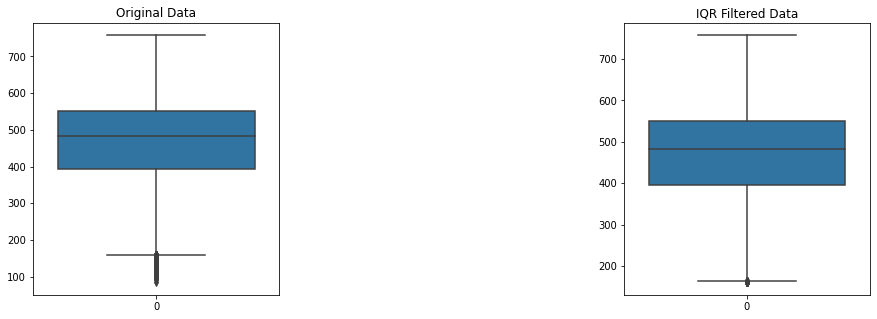

In [37]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(df['avgscore'])
plt.title('Original Data')

plt.subplot(1, 3, 3)
sns.boxplot(df_iqr_filtered['avgscore'])
plt.title('IQR Filtered Data')

plt.show()

Interquartile range filtering has removed 207 values that fall below an average score of 160.574553. It has not removed any of the highest scorers. I want to explore these 207 values further to determine whether they are truly erroneous data points. 

## Exploring the Low Scorers

In [46]:
low_scores_df = df[df["avgscore"]<160.574553].copy()

In [47]:
low_scores_df["Country"].value_counts()

Jordan    96
Egypt     81
Iran      31
Name: Country, dtype: int64

In [48]:
low_scores_df["ASBH02A"].value_counts()

native_born     202
foreign_born      6
Name: ASBH02A, dtype: int64

In [49]:
low_scores_df["avg_score_binned"] = pd.cut(low_scores_df['avgscore'], bins=10)

In [50]:
low_scores_df["avg_score_binned"].value_counts()

(152.971, 160.575]    65
(145.368, 152.971]    38
(137.765, 145.368]    36
(130.161, 137.765]    22
(114.955, 122.558]    13
(107.352, 114.955]    11
(122.558, 130.161]    11
(99.748, 107.352]      6
(92.145, 99.748]       5
(84.466, 92.145]       1
Name: avg_score_binned, dtype: int64

## Decision - Use IQR

I feel more confident using the IQR filtered dataset.  

In [43]:
df_iqr_filtered.to_excel("cleandataiqr17125.xlsx")

In [44]:
df.to_excel("cleandataiqr4225.xlsx")

# References

IEA’s Progress in International Reading Literacy Study – PIRLS 2021 Copyright © 2023 International Association for the Evaluation of Educational Achievement (IEA). Publisher: TIMSS & PIRLS International Study Center, Lynch School of Education and Human Development, Boston College.